In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import gc
import sys
sys.path.append('../')

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)
from IPython.display import HTML, display
from sklearn import metrics
import traceback 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

MERED = "merged"
PATH = "../../../data/home-credit-default-risk/"
#PATH = "../../data/home-credit-default-risk/"

/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
file_names = ['application_train', 'application_test']
tables = [pd.read_csv(f'{PATH}{file_name}.csv',low_memory=False) for file_name in file_names]

In [11]:
for t in tables:
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(DataFrameSummary(t).summary())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,NaN,NaN,NaN,NaN,307511,307511,307511,307499,307233,NaN,NaN,NaN,NaN,NaN,307511,307511,307511,307511,307511,104582,307511,307511,307511,307511,307511,307511,NaN,307509,307511,307511,NaN,307511,307511,307511,307511,307511,307511,307511,NaN,134133,306851,246546,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,NaN,NaN,159080,NaN,NaN,306490,306490,306490,306490,307510,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
mean,278181,0.0807288,NaN,NaN,NaN,NaN,0.417052,168798,599026,27108.6,538396,NaN,NaN,NaN,NaN,NaN,0.0208681,-16037,63815,-4986.12,-2994.2,12.0611,0.999997,0.819889,0.199368,0.998133,0.281066,0.0567199,NaN,2.15267,2.05246,2.03152,NaN,12.0634,0.0151442,0.0507689,0.0406587,0.0781728,0.230454,0.179555,NaN,0.50213,0.514393,0.510853,0.11744,0.0884422,0.977735,0.752471,0.0446207,0.0789415,0.149725,0.226282,0.231894,0.0663332,0.100775,0.107399,0.00880867,0.0283578,0.114231,0.0875432,0.977065,0.759637,0.0425531,0.0744897,0.145193,0.222315,0.228058,0.0649577,0.105645,0.105975,0.00807639,0.0270223,0.11785,0.0879549,0.977752,0.755746,0.0445951,0.0780778,0.149213,0.225897,0.231625,0.0671687,0.101954,0.108607,0.00865101,0.0282359,NaN,NaN,0.102547,NaN,NaN,1.42225,0.143421,1.40529,0.100049,-962.859,4.22749e-05,0.710023,8.12979e-05,0.0151149,0.0880554,0.000191863,0.081376,0.0038958,2.27634e-05,0.00391206,6.50383e-06,0.00352508,0.00293648,0.00120971,0.0099281,0.000266657,0.00812979,0.000595101,0.0005072

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744,NaN,NaN,NaN,NaN,48744,48744,48744,48720,48744,NaN,NaN,NaN,NaN,NaN,48744,48744,48744,48744,48744,16432,48744,48744,48744,48744,48744,48744,NaN,48744,48744,48744,NaN,48744,48744,48744,48744,48744,48744,48744,NaN,28212,48736,40076,24857,21103,25888,16926,15249,23555,25165,25423,16278,20490,15964,25192,15397,22660,24857,21103,25888,16926,15249,23555,25165,25423,16278,20490,15964,25192,15397,22660,24857,21103,25888,16926,15249,23555,25165,25423,16278,20490,15964,25192,15397,22660,NaN,NaN,26120,NaN,NaN,48715,48715,48715,48715,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,48744,42695,42695,42695,42695,42695,42695
mean,277797,NaN,NaN,NaN,NaN,0.397054,178432,516740,29426.2,462619,NaN,NaN,NaN,NaN,NaN,0.0212256,-16068.1,67485.4,-4967.65,-3051.71,11.786,0.999979,0.80972,0.204702,0.9984,0.26313,0.162646,NaN,2.14677,2.03816,2.0126,NaN,12.0074,0.0188331,0.0551658,0.0420359,0.0774659,0.224664,0.174216,NaN,0.50118,0.518021,0.500106,0.122388,0.0900655,0.978828,0.751137,0.0476237,0.0851683,0.151777,0.233706,0.238423,0.0671921,0.105885,0.112286,0.00923148,0.0293873,0.119078,0.0889981,0.978292,0.758327,0.045223,0.0805699,0.147161,0.22939,0.233854,0.0659141,0.110874,0.110687,0.00835754,0.0281615,0.122809,0.0895291,0.978822,0.754344,0.0474204,0.0841282,0.1512,0.233154,0.237846,0.068069,0.107063,0.113368,0.00897885,0.0292963,NaN,NaN,0.107129,NaN,NaN,1.44764,0.143652,1.43574,0.101139,-1077.77,0,0.78662,0.000102577,0.0147505,0.0874774,4.10307e-05,0.0884622,0.00449286,0,0.00116937,0,0,0,0,0,0,0.00155917,0,0,0,0.00210798,0.00180349,0.00278721,0.00929851,0.546902,1.98377
std,103170,NaN,NaN,NaN,NaN,0.709047,101523,365397,16016.4,336710,NaN,NaN,NaN,NaN,NaN,0.0144282,4325.9,144349,3552.61,1569.28,11.4629,0.00452939,0.3925

In [4]:
train, test = tables

In [5]:
contin_vars = [
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'REGION_POPULATION_RELATIVE',
'EXT_SOURCE_1',
'EXT_SOURCE_2',
'EXT_SOURCE_3',
'APARTMENTS_AVG',
'BASEMENTAREA_AVG',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG',
'COMMONAREA_AVG',
'ELEVATORS_AVG',
'ENTRANCES_AVG',
'FLOORSMAX_AVG',
'FLOORSMIN_AVG',
'LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG',
'LIVINGAREA_AVG',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAREA_AVG',
'APARTMENTS_MODE',
'BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_MODE',
'COMMONAREA_MODE',
'ELEVATORS_MODE',
'ENTRANCES_MODE',
'FLOORSMAX_MODE',
'FLOORSMIN_MODE',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_MODE',
'APARTMENTS_MEDI',
'BASEMENTAREA_MEDI',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BUILD_MEDI',
'COMMONAREA_MEDI',
'ELEVATORS_MEDI',
'ENTRANCES_MEDI',
'FLOORSMAX_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI',
'TOTALAREA_MODE'
]

index = 'SK_ID_CURR'
dep = 'TARGET'

cat_vars = train.drop(contin_vars + [index, dep], axis=1).columns.tolist()

In [48]:
len(contin_vars), len(cat_vars)

(3, 47)

In [47]:
len(train.columns) == len(contin_vars) + len(cat_vars) + len([index, dep])

False

In [6]:
def auc(inp, targ):
    #return metrics.roc_auc_score(to_np(targ), to_np(np.exp(inp[:,1])))
    return metrics.roc_auc_score(to_np(targ), to_np(inp))


In [7]:
def print_score(m):
    res = [auc(m.predict(X_train), y_train), auc(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [8]:
def delete_by_nan(ratio=0.5):
    null_ratio = train.isnull().sum().sort_values(ascending=False) / len(train)
    filtered_by_null = null_ratio[null_ratio > ratio]
    
    joined = train.drop(columns=filtered_by_null.index, axis=1, inplace=False)
    joined_test = test.drop(columns=filtered_by_null.index, axis=1, inplace=False)
    
    deleted_columns = set(train.columns) - set(joined.columns)
                
    contin = list(set(contin_vars) - deleted_columns)    
    cat = list(set(cat_vars) - deleted_columns)
    
    return (joined, joined_test, contin, cat)
    

In [11]:
joined, joined_test, contin_vars, cat_vars = delete_by_nan()

In [44]:
contin_vars = list(set(contin_vars) - set(most_impotent))
cat_vars = list(set(cat_vars) - set(most_impotent))

In [9]:
joined = train[cat_vars+contin_vars+[dep, index]].copy()

In [10]:
test[dep] = 0
joined_test = test[cat_vars+contin_vars+[dep, index]].copy()

In [11]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

In [12]:
for v in cat_vars: joined_test[v] = joined_test[v].astype('category').cat.as_ordered()

In [53]:
#for v in contin_vars:
#    joined[v] = joined[v].fillna(0).astype('float32')
#    joined_test[v] = joined_test[v].fillna(0).astype('float32')

In [13]:
apply_cats(joined_test, joined)

In [14]:
try:
    df, y, nas = proc_df(joined, 'TARGET')
except:
    extype, value, tb = sys.exc_info()
    traceback.print_exc()
    pdb.post_mortem(tb)

In [15]:
df_test, _, nas = proc_df(joined_test, 'TARGET', na_dict=nas)

In [16]:
df_test.shape, df.shape

((48744, 169), (307511, 169))

In [58]:
df_test.head()

,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_4,REG_REGION_NOT_LIVE_REGION,FLAG_DOCUMENT_19,FLAG_OWN_CAR,AMT_REQ_CREDIT_BUREAU_WEEK,NAME_TYPE_SUITE,FLAG_EMAIL,AMT_REQ_CREDIT_BUREAU_HOUR,...,FLAG_DOCUMENT_21,FLAG_PHONE,FLAG_DOCUMENT_10,FLOORSMAX_MEDI,FLOORSMAX_AVG,FLOORSMAX_MODE,SK_ID_CURR,FLOORSMAX_MEDI_na,FLOORSMAX_AVG_na,FLOORSMAX_MODE_na
0,1,1,1,1,1,1,1,7,2,1,...,1,1,1,0.1250,0.1250,0.1250,100001,False,False,False
1,1,1,1,1,1,1,1,7,1,1,...,1,1,1,0.1667,0.1667,0.1667,100005,True,True,True
2,1,1,1,1,1,2,1,0,1,1,...,1,1,1,0.1667,0.1667,0.1667,100013,True,True,True
3,1,1,1,1,1,1,1,7,1,1,...,1,2,1,0.3750,0.3750,0.3750,100028,False,False,False
4,1,1,1,1,1,2,0,7,1,0,...,1,1,1,0.1667,0.1667,0.1667,100038,True,True,True


In [16]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 48744  # same as Kaggle's test set size
n_trn = len(df) - n_valid

In [17]:
set_rf_samples(20000)

In [18]:
y_train, y_valid = split_vals(y, n_trn)

In [21]:
m = RandomForestClassifier(n_estimators=160, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
X_train, X_valid = split_vals(df, n_trn)
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [19]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [22]:
fi = rf_feat_importance(m, df)

In [25]:
to_keep = fi[fi.imp > 0.005].cols; len(to_keep)

34

In [28]:
df_keep = df[to_keep].copy()

In [29]:
m = RandomForestClassifier(n_estimators=160, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
X_train, X_valid = split_vals(df_keep, n_trn)
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [31]:
fi = rf_feat_importance(m, df_keep)

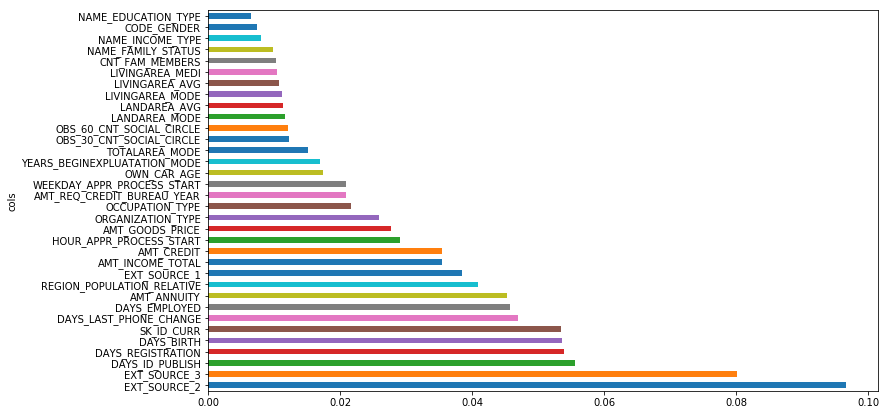

In [32]:
plot_fi(fi)

In [33]:
from scipy.cluster import hierarchy as hc

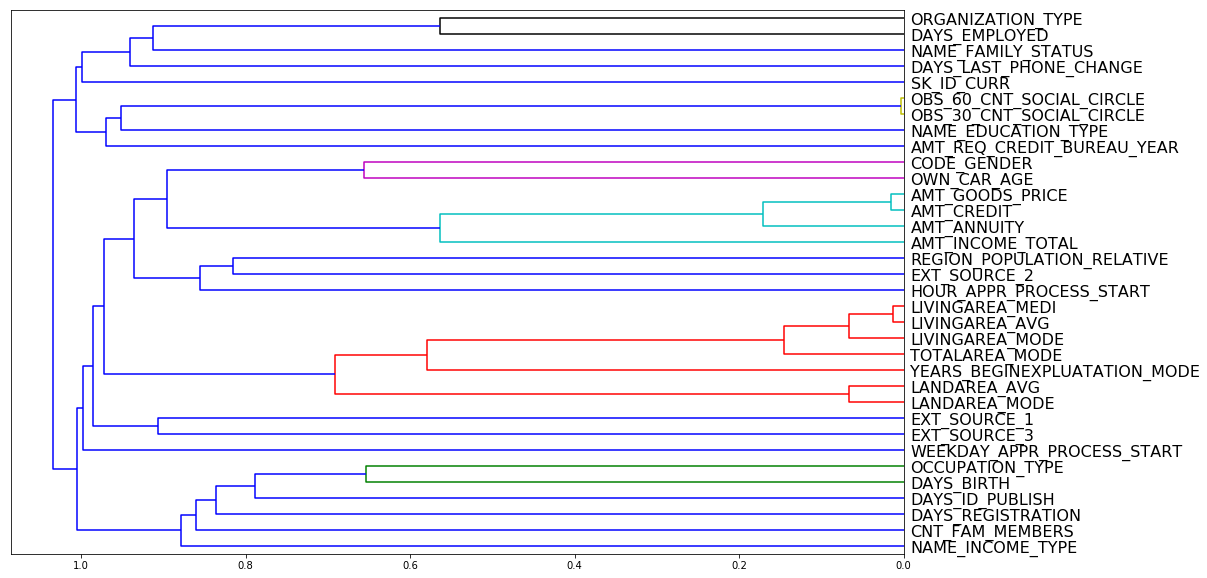

In [42]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [38]:
def get_oob(df):
    m = RandomForestClassifier(n_estimators=160, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [45]:
base_oob = get_oob(df_keep)
base_oob

0.9190893738382406

In [44]:
for c in ('OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
          'LIVINGAREA_MEDI', 'LIVINGAREA_AVG'):
    del_oob = get_oob(df_keep.drop(c, axis=1))
    print(c, del_oob, del_oob > base_oob)
    

OBS_60_CNT_SOCIAL_CIRCLE 0.9191318831226547 True
OBS_30_CNT_SOCIAL_CIRCLE 0.9191589344854637 True
AMT_GOODS_PRICE 0.919108696240247 True
AMT_CREDIT 0.9190855093578393 True
LIVINGAREA_MEDI 0.9191705279266676 True
LIVINGAREA_AVG 0.9190623224754315 False


In [ ]:
df_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));

In [21]:
try:    
    print_score(m)
except:
    extype, value, tb = sys.exc_info()
    traceback.print_exc()
    pdb.post_mortem(tb)


[0.5039163068353973, 0.5022469165531825, 0.9195183311627835, 0.9207287050713934, 0.9191009672794445]


In [22]:
#[0.5058078669324587, 0.5038759673830006, 0.9196806393396376, 0.920462005580174, 0.919108696240247]
pred = m.predict_proba(df_test)

In [23]:
pred_1 = [p[1] for p in pred]

In [24]:
pred_1

[0.09374999999999999,
 0.15562499999999999,
 0.03302083333333334,
 0.09937500000000002,
 0.22083333333333327,
 0.08854166666666669,
 0.042499999999999996,
 0.0821875,
 0.03749999999999999,
 0.3042708333333333,
 0.1589583333333333,
 0.09322916666666667,
 0.153125,
 0.19062500000000004,
 0.100625,
 0.21708333333333335,
 0.09375000000000001,
 0.07041666666666666,
 0.18499999999999997,
 0.05239583333333334,
 0.0521875,
 0.0679166666666667,
 0.14916666666666661,
 0.043958333333333335,
 0.05791666666666666,
 0.17281249999999995,
 0.05125,
 0.08437499999999999,
 0.103125,
 0.12052083333333334,
 0.015104166666666665,
 0.029166666666666667,
 0.2363541666666667,
 0.07447916666666667,
 0.03937499999999999,
 0.195,
 0.049374999999999995,
 0.24614583333333329,
 0.028541666666666667,
 0.25229166666666675,
 0.20735119047619052,
 0.09864583333333334,
 0.19937499999999994,
 0.058541666666666645,
 0.1252083333333333,
 0.15104166666666666,
 0.04791666666666667,
 0.22906250000000003,
 0.07843750000000001,

In [25]:
submission = pd.DataFrame({'SK_ID_CURR': df_test['SK_ID_CURR'],
              'TARGET': pred_1})
submission.to_csv('submission.csv', index=False, float_format='%.8f')

In [26]:
ls

'Home Credit Default Risk.ipynb'                  'Plant Seedling clf.ipynb'
'Home Credit Default Risk (only app).ipynb'        README.md
'Home Credit Default Risk (random forest).ipynb'   submission.csv
